In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
dfprop=pd.read_csv(filepath_or_buffer='properati_buffered.csv',delimiter=',',index_col = 0 )

In [45]:
dfprop.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'district_name', 'city_name',
       'cota_inf', 'cota_sup', 'district_name_key', 'dm_CONDOMINIO',
       'dm_CONSTRUCCION', 'dm_QUINCHO', 'dm_BARRIO CERRADO', 'dm_BAULERA',
       'dm_VIGILANCIA', 'dm_OBRA', 'dm_PARRILLA', 'dm_CERRADO',
       'dm_MONOAMBIENTE', 'dm_ESCUELA', 'dm_EXPENSA', 'dm_POZO', 'dm_AMPLIO',
       'dm_LUMINOSO', 'dm_PILETA', 'ambientes_desc', 'ambientes_title',
       'baños'],
      dtype='object')

In [4]:
# Generamos una key de zona
dfprop['district_name_key']=dfprop['country_name']+"-"+\
                            dfprop['state_name']+"-"+\
                            dfprop['district_name']


## Construccion de Dummies
-  Efectuar una inspeccion de los campos title y description para indicar la existencia de palabras claves 

In [5]:
def new_dummy_from_included_in_column(dfprop_aux,column,word):
    #dfprop_aux=dfprop
    #word='POZO'
    
    #Creamos la expresion regular ..."que el texto empiece con"... word 
    re_word="("+word+")"
    
    #Creamos la expresion regular
    re_search=dfprop[column].str.extract(re_word,expand=False)
    
    #re_search[((re_search!=-1)&(~(pd.isna(re_search))))].index
    #Creamos la columna dummy y seteamos todos los rows en 0
    dfprop_aux.loc[:,"dm_"+word]=0
    
    #Extraemos la lista de de indices donde la expresion se cumple
    prop_re_list =np.array(re_search[((re_search!=-1)&(~(pd.isna(re_search))))].index)
    
    #Actualizamos el valor de la columna Dummy a 1 en los casos dentro del indice enviado
    dfprop_aux.loc[dfprop_aux.index.isin(prop_re_list),"dm_"+word]=1
    
    return dfprop_aux

def new_dummy_from_included(dfprop_aux_,word_):
    dfprop_aux_=new_dummy_from_included_in_column(dfprop_aux_,'description',word_)
    dfprop_aux_=new_dummy_from_included_in_column(dfprop_aux_,'title',word_)
    print_dummy_count_rows(dfprop_aux_,'dm_'+word_)
    return dfprop_aux_

def print_dummy_count_rows(dfprop_aux_p,word_p):
    print('Cantidad de rows con '+word_p+": ",dfprop_aux_p.loc[dfprop_aux_p[word_p]==1,'operation'].count())
    

In [6]:
dfprop=new_dummy_from_included(dfprop,'CONDOMINIO')
dfprop=new_dummy_from_included(dfprop,'CONSTRUCCION')
dfprop=new_dummy_from_included(dfprop,'QUINCHO')
dfprop=new_dummy_from_included(dfprop,'BARRIO CERRADO')
dfprop=new_dummy_from_included(dfprop,'BAULERA')
dfprop=new_dummy_from_included(dfprop,'VIGILANCIA')
dfprop=new_dummy_from_included(dfprop,'OBRA')
dfprop=new_dummy_from_included(dfprop,'PARRILLA')
dfprop=new_dummy_from_included(dfprop,'CERRADO')
dfprop=new_dummy_from_included(dfprop,'MONOAMBIENTE')
dfprop=new_dummy_from_included(dfprop,'ESCUELA')
dfprop=new_dummy_from_included(dfprop,'EXPENSA')
dfprop=new_dummy_from_included(dfprop,'POZO')
dfprop=new_dummy_from_included(dfprop,'AMPLIO')
dfprop=new_dummy_from_included(dfprop,'LUMINOSO')
dfprop=new_dummy_from_included(dfprop,'PILETA')

Cantidad de rows con dm_CONDOMINIO:  89
Cantidad de rows con dm_CONSTRUCCION:  278
Cantidad de rows con dm_QUINCHO:  174
Cantidad de rows con dm_BARRIO CERRADO:  133
Cantidad de rows con dm_BAULERA:  165
Cantidad de rows con dm_VIGILANCIA:  11
Cantidad de rows con dm_OBRA:  45
Cantidad de rows con dm_PARRILLA:  161
Cantidad de rows con dm_CERRADO:  160
Cantidad de rows con dm_MONOAMBIENTE:  900
Cantidad de rows con dm_ESCUELA:  1
Cantidad de rows con dm_EXPENSA:  156
Cantidad de rows con dm_POZO:  768
Cantidad de rows con dm_AMPLIO:  373
Cantidad de rows con dm_LUMINOSO:  544
Cantidad de rows con dm_PILETA:  268


In [7]:
"""Definimos una funcion que busque un número en una columna de un df, en base a un termino, por ejemplo: 
de '2 ambientes', con el termino 'ambientes' extraer el número '2'"""
def word_lookup(df, target_column, word):
    #importamos el modulo re que nos permite usar expresiones regulares facilmente
    import re
    #creamos una lista auxiliar
    word_list_aux = []
    #definimos el loop que analizara la columna del df
    for i in range(len(df.index)):
        if re.search(r"\d\s"+str(word), str(df[target_column].iloc[i]), flags = re.IGNORECASE):
            word_list_aux.append(float(re.search(r"\d",re.search(r"\d\s"+str(word), df[target_column].iloc[i], flags = re.IGNORECASE).group()).group()))
        else:
            word_list_aux.append(np.nan)
    return word_list_aux

In [8]:
ambientes_desc_list = word_lookup(dfprop, 'description', 'amb')

In [9]:
dfprop['ambientes_desc'] = ambientes_desc_list

In [10]:
ambientes_title_list = word_lookup(dfprop, 'title', 'amb')
dfprop['ambientes_title'] = ambientes_title_list
baño_desc_list = word_lookup(dfprop, 'description', 'baño')
bano_desc_list = word_lookup(dfprop, 'description', 'bano')
df_aux_baño = pd.DataFrame(baño_desc_list)
df_aux_bano = pd.DataFrame(bano_desc_list)
df_aux_baño = df_aux_baño.combine_first(df_aux_bano)
df_aux_baño.fillna(value = 1, inplace= True)

In [11]:
df_aux_baño.rename(mapper = {0:'baños'}, axis = 1, inplace= True)
dfprop['baños'] = df_aux_baño['baños']

In [12]:
dfprop_aux_amb = dfprop['ambientes_desc']
dfprop_aux_rooms = dfprop['rooms']
dfprop_aux_amb = dfprop_aux_amb.combine_first(dfprop_aux_rooms)
dfprop['ambientes_desc'] = dfprop_aux_amb
dfprop['ambientes_desc'] = dfprop[['ambientes_desc']].combine_first(dfprop[['ambientes_title']])

In [13]:
#Calculo cuantos registros no tienen dato alguno de cantidad de ambientes
dfprop[(dfprop.rooms.isna()==True)&(dfprop.ambientes_desc.isna()==True)&(dfprop.ambientes_title.isna()==True)]['operation'].count()

39450

In [14]:
#nan en ambientes_desc
len(dfprop)-dfprop['ambientes_desc'].count()

41829

In [15]:
#nan en ambientes_title
len(dfprop)-dfprop['ambientes_title'].count()

79770

In [16]:
#cantidad de operaciones de monoambientes
dfprop['dm_MONOAMBIENTE'].sum()

900

In [17]:
#Imputacion de los monoambientes dentro de la columna ambientes_desc
dfprop.loc[dfprop['dm_MONOAMBIENTE']==1, 'ambientes_desc']=1
dfprop.loc[dfprop['dm_MONOAMBIENTE']==1][['rooms','dm_MONOAMBIENTE','ambientes_desc','ambientes_title']].head()

,rooms,dm_MONOAMBIENTE,ambientes_desc,ambientes_title
6,NaN,1,1.0,NaN
215,1.0,1,1.0,NaN
443,NaN,1,1.0,NaN
711,1.0,1,1.0,NaN
712,2.0,1,1.0,NaN


In [18]:
dfprop.loc[dfprop['price_usd_per_m2']>8000].count()

operation                     668
property_type                 668
place_name                    668
place_with_parent_names       668
country_name                  668
state_name                    668
geonames_id                   662
lat-lon                       128
lat                           128
lon                           128
price                         668
currency                      668
price_aprox_local_currency    618
price_aprox_usd               668
surface_total_in_m2           666
surface_covered_in_m2         666
price_usd_per_m2              668
price_per_m2                  607
floor                           0
rooms                         649
expenses                        3
properati_url                 668
description                   668
title                         668
image_thumbnail               668
district_name                 668
city_name                       7
cota_inf                      668
cota_sup                      668
district_name_

In [40]:
#Creacion de df auxiliar para graficos. Se quita amb_desc = Nan & valor metro cuadrado mayor a 8000
#!!!Reconfirmar que ambientes_desc sea la columna definitiva, revisar cantidad de casos nan
dfprop_aux=dfprop.loc[dfprop['ambientes_desc'].isna()==False]
dfprop_aux=dfprop_aux.loc[dfprop['price_usd_per_m2']<8000]
dfprop_aux=dfprop_aux.loc[dfprop['price_usd_per_m2']>1000]
dfprop_aux=dfprop_aux.loc[dfprop['ambientes_desc']!=0]
dfprop_aux=dfprop_aux.loc[dfprop['ambientes_desc']<7]
dfprop_aux['price_usd_per_m2'].describe()

count    49010.000000
mean      2167.139168
std        826.350607
min       1000.158833
25%       1590.749931
50%       2013.888889
75%       2567.541060
max       7978.723404
Name: price_usd_per_m2, dtype: float64

In [59]:
district_dummies = pd.get_dummies(dfprop_aux.district_name)
dfprop_aux = pd.concat([dfprop_aux, district_dummies], axis=1)
district_dummies.columns

Index(['Abasto', 'Agronomía', 'Almagro', 'Almirante Brown', 'Avellaneda',
       'Bahía Blanca', 'Balcarce', 'Balvanera', 'Barracas', 'Barrio Norte',
       ...
       'Villa Gesell', 'Villa La Angostura', 'Villa Lugano', 'Villa Luro',
       'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real', 'Villa Santa Rita',
       'Villa Urquiza', 'Villa del Parque'],
      dtype='object', length=141)

In [42]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets,preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
X=dfprop_aux[district_dummies.columns]
y=dfprop_aux['price_usd_per_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(34307, 282) (34307,)
(14703, 282) (14703,)


In [65]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada
from sklearn.gaussian_process import GaussianProcessRegressor
al_ridge = np.linspace(0.001, 0.3, 300)
al_lasso = np.linspace(0.1, 0.5, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

#lm = GaussianProcessRegressor()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
#lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

In [66]:
# Hacemos los fits respectivos
#lm.fit(X_train, y_train)
lm_ridge_cv.fit(X_train, y_train)
#lm_lasso_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.002, ..., 0.299, 0.3  ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [67]:
lm_ridge_cv.score(X_train, y_train)

0.5459811021226746

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


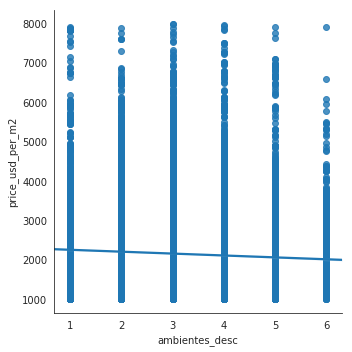

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_select=dfprop_aux[['price_usd_per_m2', 'ambientes_desc']]


# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="ambientes_desc", y="price_usd_per_m2", data=df_select)
